<a href="https://colab.research.google.com/github/godpiss/PyTorch_excercises/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn



In [2]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np

n_samples=1000
X,y=make_moons(n_samples,noise=0.03,random_state=42)


In [3]:
print(f"the value of x:{X}")
print(f"the value of y:{y}")

the value of x:[[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 ...
 [ 1.65391483 -0.29179795]
 [-0.9341017   0.35358221]
 [ 0.7968358   0.60423662]]
the value of y:[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0

In [4]:
moons=pd.DataFrame({"X1":X[:,0],
                    "X2":X[:,1],
                   "label":y})
moons.head()

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


In [5]:
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

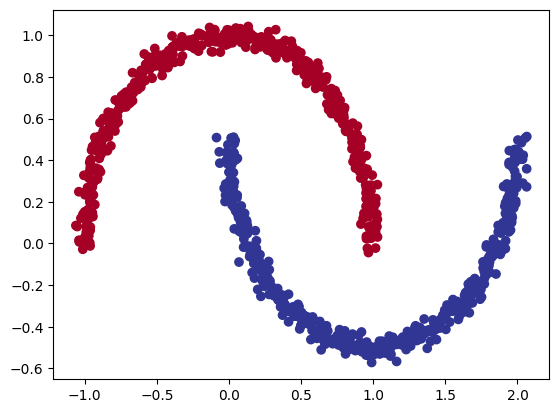

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [7]:
y.shape

(1000,)

In [8]:
import torch
x=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
x[:5],y[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [10]:
# Standard PyTorch imports

from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [11]:
from torch import nn
class BinaryClassification(nn.Module):
    def  __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=4)
        self.layer_2=nn.Linear(in_features=4,out_features=8)
        self.layer_3=nn.Linear(in_features=8,out_features=1)
        self.relu=nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0=BinaryClassification().to(device)
model_0



BinaryClassification(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.04)



let's see what comes out of our model during the forward pass (the forward pass is defined by the forward() method).The raw outputs (unmodified) of this equation (
y
 ) and in turn, the raw outputs of our model are often referred to as logits.

That's what our model is outputing above when it takes in the input data (
x
  in the equation or X_test in the code), logits.

In [13]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc




In [14]:
# Fit the model
torch.manual_seed(42)
epochs = 1000
model_0.to(device)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69394, Accuracy: 50.00% | Test Loss: 0.69229, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.60470, Accuracy: 77.00% | Test Loss: 0.61287, Test Accuracy: 72.50%
Epoch: 200 | Loss: 0.45947, Accuracy: 80.38% | Test Loss: 0.48304, Test Accuracy: 78.50%
Epoch: 300 | Loss: 0.34911, Accuracy: 83.75% | Test Loss: 0.37141, Test Accuracy: 84.50%
Epoch: 400 | Loss: 0.27636, Accuracy: 87.00% | Test Loss: 0.28683, Test Accuracy: 88.00%
Epoch: 500 | Loss: 0.24332, Accuracy: 88.50% | Test Loss: 0.24664, Test Accuracy: 89.50%
Epoch: 600 | Loss: 0.22928, Accuracy: 89.25% | Test Loss: 0.22825, Test Accuracy: 90.50%
Epoch: 700 | Loss: 0.22197, Accuracy: 89.50% | Test Loss: 0.21835, Test Accuracy: 90.50%
Epoch: 800 | Loss: 0.21680, Accuracy: 89.50% | Test Loss: 0.21153, Test Accuracy: 90.50%
Epoch: 900 | Loss: 0.21213, Accuracy: 89.25% | Test Loss: 0.20582, Test Accuracy: 91.00%


In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


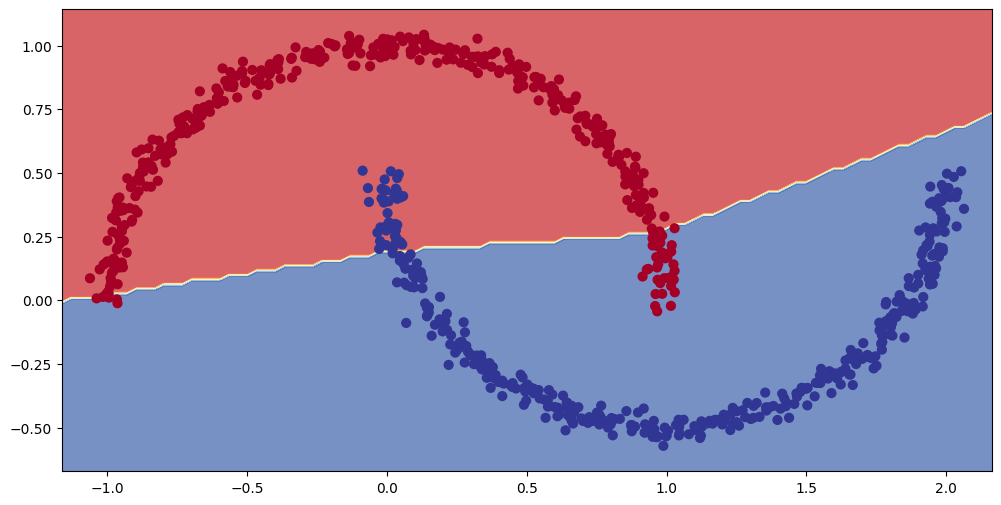

In [16]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plot_decision_boundary(model_0, X_train, y_train)

In [17]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


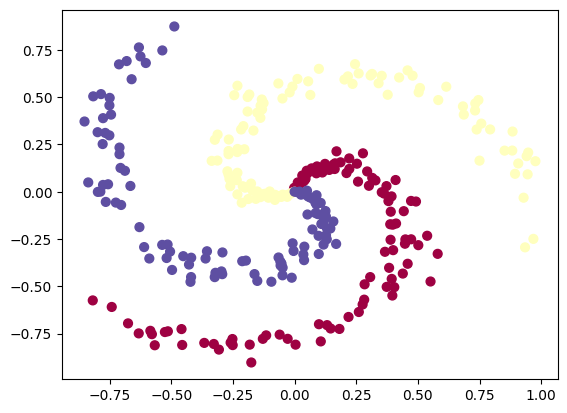

In [18]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

##  MULTICLASS CLASSIFICATION

In [27]:

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long


# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)




(240, 60, 240, 60)

In [21]:
from torch import nn

# Build model
class SpiralData(nn.Module):
    def __init__(self):
         super().__init__()
         self.linear1 = nn.Linear(in_features=2, out_features=10)
         self.linear2 = nn.Linear(in_features=10, out_features=10)
         self.linear3 = nn.Linear(in_features=10, out_features=3)
         self.relu = nn.ReLU()




    def forward(self, x):
     return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

# Create an instance of SpiralData and send it to the target device
model_4 = SpiralData().to(device)
model_4

SpiralData(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [22]:

# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
print(model_4(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_4(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_4(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.float32 torch.float32
Logits:
tensor([[-0.2381, -0.0672,  0.3827],
        [-0.2298, -0.0529,  0.2558],
        [-0.2222, -0.0442,  0.2661],
        [-0.2213, -0.0438,  0.2651],
        [-0.2109, -0.0543,  0.2337],
        [-0.2214, -0.0442,  0.2575],
        [-0.2087, -0.0545,  0.2316],
        [-0.2216, -0.0593,  0.2409],
        [-0.2155, -0.0403,  0.3021],
        [-0.2314, -0.0574,  0.2535]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2471, 0.2932, 0.4597],
        [0.2619, 0.3126, 0.4256],
        [0.2615, 0.3124, 0.4261],
        [0.2617, 0.3126, 0.4257],
        [0.2681, 0.3136, 0.4183],
        [0.2626, 0.3135, 0.4239],
        [0.2688, 0.3136, 0.4175],
        [0.2657, 0.3125, 0.4219],
        [0.2584, 0.3079, 0.4336],
        [0.2622, 0.3120, 0.4258]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [32]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(),
                            lr=0.01) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [24]:

# Let's calculate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn


MulticlassAccuracy()

In [33]:
# Build a training loop for the model
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model_4.to(device)

# Loop over data
for epoch in range(epochs):
  ## Training
  model_4.train()
  # 1. forward pass
  y_logits = model_4(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step

  optimizer.step()

  ## Testing
  model_4.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 100 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 200 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 300 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 400 | Loss: 0.01 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 500 | Loss: 0.01 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 600 | Loss: 0.01 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 700 | Loss: 0.01 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.01 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.01 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


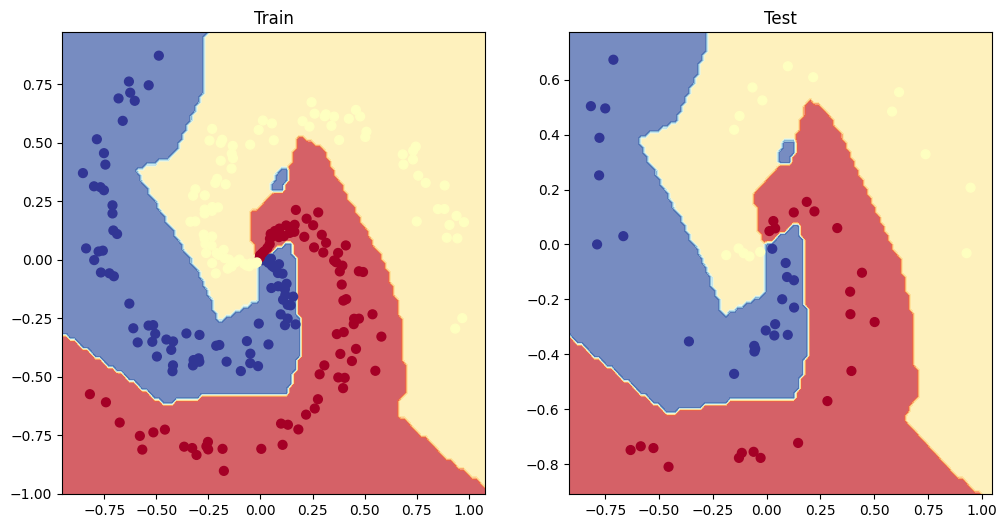

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)